# Pandas

The `numpy` module is excellent for numerical computations, but to handle missing data or arrays with mixed types takes more work. The `pandas` module is currently the most widely used tool for data manipulation, providing high-performance, easy-to-use data structures and advanced data analysis tools.

In particular `pandas` features:

* A fast and efficient "DataFrame" object for data manipulation with integrated indexing;
* Tools for reading and writing data between in-memory data structures and different formats (CSV, Excel, SQL, HDF5);
* Intelligent data alignment and integrated handling of missing data;
* Intelligent label-based slicing, fancy indexing, and subsetting of large data sets;
* Aggregating or transforming data with a powerful "group-by" engine; 
* High performance merging and joining of data sets;
* Hierarchical axis indexing provides an intuitive way of working with high-dimensional data in a lower-dimensional data structure;
* Time series-functionalities;
* Highly optimized for performance, with critical code paths written in Cython or C.


In [1]:
import pandas as pd
import numpy as np

## Series

Series are completely equivalent to 1D array but with axis labels and the possibility to store heterogeneous elements. Of paramount importance are the time-series, used to define time evolutions of a phenomenon. 


In [2]:
from string import ascii_lowercase as letters

# Creating a series, accessing indexes, values and values by their index 
xs = pd.Series(np.arange(10)*0.5, index=tuple(letters[:10]))
print ("xs:", xs,'\n')
print ("xs indexes:",xs.index,'\n')
# Values of the Series are actually a numpy array
print ("xs values:", xs.values, type(xs.values),'\n')
print (xs['f'], xs.f, xs.h, '\n')
print (xs[['d', 'f', 'h']], '\n')
print (type(xs[['d', 'f', 'h']]), '\n')

xs: a    0.0
b    0.5
c    1.0
d    1.5
e    2.0
f    2.5
g    3.0
h    3.5
i    4.0
j    4.5
dtype: float64 

xs indexes: Index(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j'], dtype='object') 

xs values: [0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5] <class 'numpy.ndarray'> 

2.5 2.5 3.5 

d    1.5
f    2.5
h    3.5
dtype: float64 

<class 'pandas.core.series.Series'> 



In [3]:
# Extracting elements and operations: same as numpy array
print (xs[:3],'\n')
print (xs[7:], '\n')
print (xs[::3], '\n')
print (xs[xs>3], '\n')
print (np.exp(xs), '\n')
print (np.mean(xs), np.std(xs), '\n')

a    0.0
b    0.5
c    1.0
dtype: float64 

h    3.5
i    4.0
j    4.5
dtype: float64 

a    0.0
d    1.5
g    3.0
j    4.5
dtype: float64 

h    3.5
i    4.0
j    4.5
dtype: float64 

a     1.000000
b     1.648721
c     2.718282
d     4.481689
e     7.389056
f    12.182494
g    20.085537
h    33.115452
i    54.598150
j    90.017131
dtype: float64 

2.25 1.4361406616345072 



In [4]:
# Series can be created from python dictionary too.
# Not that the elements can be whatever!
d = {'b' : 1, 'a' : 'cat', 'c' : [2,3]}
pd.Series(d)



b         1
a       cat
c    [2, 3]
dtype: object

A key difference between Series and ndarray is that operations between Series automatically align the data based on label. Thus, you can write computations without considering whether the Series involved have the same labels.

In [5]:
s = pd.Series(np.random.randn(5), index=tuple(letters[:5]))
print(s)
s = s[1:] + s[:-1]
print(s)

a    0.361629
b    1.920489
c    0.290302
d    1.230538
e   -0.636489
dtype: float64
a         NaN
b    3.840978
c    0.580603
d    2.461076
e         NaN
dtype: float64


### Time series

Time series are very often used to profile the behaviour of a quantity as a function of time. Pandas has a special index for that, `DatetimeIndex`, that can be created e.g. with the function `pd.data_range()`

In [6]:
# to define a date, the datetime module is very useful
import datetime as dt
date = dt.date.today()
print(date)

date = dt.datetime(2022,11,30,10,45,10,15)
print (date)

# otherwise, several notations are interpreted too
date = 'Nov 30 2022'
# or alternatively
date = '30/11/2022 10:45:00'
print (date)

days = pd.date_range(date, periods=7, freq='D')
print (days)

seconds = pd.date_range(date, periods=3600, freq='s')
print (seconds)


2022-11-30
2022-11-30 10:45:10.000015
30/11/2022 10:45:00
DatetimeIndex(['2022-11-30 10:45:00', '2022-12-01 10:45:00',
               '2022-12-02 10:45:00', '2022-12-03 10:45:00',
               '2022-12-04 10:45:00', '2022-12-05 10:45:00',
               '2022-12-06 10:45:00'],
              dtype='datetime64[ns]', freq='D')
DatetimeIndex(['2022-11-30 10:45:00', '2022-11-30 10:45:01',
               '2022-11-30 10:45:02', '2022-11-30 10:45:03',
               '2022-11-30 10:45:04', '2022-11-30 10:45:05',
               '2022-11-30 10:45:06', '2022-11-30 10:45:07',
               '2022-11-30 10:45:08', '2022-11-30 10:45:09',
               ...
               '2022-11-30 11:44:50', '2022-11-30 11:44:51',
               '2022-11-30 11:44:52', '2022-11-30 11:44:53',
               '2022-11-30 11:44:54', '2022-11-30 11:44:55',
               '2022-11-30 11:44:56', '2022-11-30 11:44:57',
               '2022-11-30 11:44:58', '2022-11-30 11:44:59'],
              dtype='datetime64[ns]', leng

To learn more about the frequency strings, please see this [link](http://pandas.pydata.org/pandas-docs/stable/timeseries.html#offset-aliases)


Timestamped data is the most basic type of time series data that associates values with points in time. For pandas objects it means using the points in time.

functions like `pd.to_datetime` can be used, for instance, when reading information as string from a dataset.

Timestamp is the pandas equivalent of python’s Datetime and is interchangeable with it in most cases. 

In [7]:
tstamp = pd.Timestamp(dt.datetime(2020, 11, 9))

# internally it counts the nanoseconds from January 1st 19
#tstamp = pd.Timestamp(dt.datetime(1970, 1, 1, 0, 0, 0, 1))
print(tstamp.value)

# when creating a timestamp the format can be explicitly passed
ts = pd.to_datetime('2010/11/12', format='%Y/%m/%d')
print (type(ts))
print (ts.value)
ts = pd.to_datetime('12-11-2010 00:00', format='%d-%m-%Y %H:%M')
print (ts)
print (ts.value)



1604880000000000000
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
1289520000000000000
2010-11-12 00:00:00
1289520000000000000


A standard series can be created and (range of) elements can be used as indexes

In [8]:
tseries = pd.Series(np.random.normal(10, 1, len(days)), index=days)
# Extracting elements
print (tseries[0:4], '\n')
print (tseries['2022-11-30':'2022-12-01'], '\n') # Note - includes end time


2022-11-30 10:45:00     9.593124
2022-12-01 10:45:00    11.108181
2022-12-02 10:45:00    10.404881
2022-12-03 10:45:00     9.360170
Freq: D, dtype: float64 

2022-11-30 10:45:00     9.593124
2022-12-01 10:45:00    11.108181
Freq: D, dtype: float64 



`pd.to_datetime` can also be used to create a `DatetimeIndex`:

In [9]:
pd.to_datetime([1, 2, 3, 4], unit='D', origin=pd.Timestamp('1980-02-03'))

DatetimeIndex(['1980-02-04', '1980-02-05', '1980-02-06', '1980-02-07'], dtype='datetime64[ns]', freq=None)

## DataFrame

A pandas DataFrame is like a simple tabular spreadsheet. For future reference (or for people already familiar with R), a pandas DataFrame is very similar to the R DataFrame.

Each column in a DataFrame is a Series object.

The element can be whatever, missing data are dealt with too (as NaN)

### DataFrame creation

A DataFrame can be created implicitly, with, e.g., a DatatimeIndex object as index:

In [10]:
entries=10
dates=pd.date_range('11/30/2022 10:45:00',freq='h', periods=entries)
df = pd.DataFrame(np.random.randn(entries,4), index=dates, columns=['A','B','C','D'])
df


,A,B,C,D
2022-11-30 10:45:00,0.163922,1.056396,-0.148768,-0.469077
2022-11-30 11:45:00,-0.504917,1.617719,0.747975,-1.067499
2022-11-30 12:45:00,-0.593228,0.098517,1.483653,0.009978
2022-11-30 13:45:00,0.064602,1.044391,-0.772416,-0.129108
2022-11-30 14:45:00,-0.925014,1.295330,-0.508451,1.782452
2022-11-30 15:45:00,0.788541,-0.964109,0.797093,0.516213
2022-11-30 16:45:00,-0.473016,0.123193,-0.170845,1.013793
2022-11-30 17:45:00,-0.529238,-0.166810,-0.518051,0.992812
2022-11-30 18:45:00,0.525105,-0.515199,1.674429,-0.560344
2022-11-30 19:45:00,-0.666788,0.514394,-1.706770,-0.313156


or by means of a dictionary:


In [11]:
df2 = pd.DataFrame(
    { 'A' : 1.,
      'B' : pd.Timestamp('20130102'),
      'C' : pd.Series(1,index=range(4),dtype='float32'),
      'D' : np.arange(7,11),
      'E' : pd.Categorical(["test","train","test","train"]),
    }
    )
df2

# check what happens if D and E had different lenghts 

,A,B,C,D,E
0,1.0,2013-01-02,1.0,7,test
1,1.0,2013-01-02,1.0,8,train
2,1.0,2013-01-02,1.0,9,test
3,1.0,2013-01-02,1.0,10,train


### Viewing Data

In [12]:
df.head(2)

,A,B,C,D
2022-11-30 10:45:00,0.163922,1.056396,-0.148768,-0.469077
2022-11-30 11:45:00,-0.504917,1.617719,0.747975,-1.067499


In [13]:
df.tail(4)

,A,B,C,D
2022-11-30 16:45:00,-0.473016,0.123193,-0.170845,1.013793
2022-11-30 17:45:00,-0.529238,-0.166810,-0.518051,0.992812
2022-11-30 18:45:00,0.525105,-0.515199,1.674429,-0.560344
2022-11-30 19:45:00,-0.666788,0.514394,-1.706770,-0.313156


In [14]:
df.index

DatetimeIndex(['2022-11-30 10:45:00', '2022-11-30 11:45:00',
               '2022-11-30 12:45:00', '2022-11-30 13:45:00',
               '2022-11-30 14:45:00', '2022-11-30 15:45:00',
               '2022-11-30 16:45:00', '2022-11-30 17:45:00',
               '2022-11-30 18:45:00', '2022-11-30 19:45:00'],
              dtype='datetime64[ns]', freq='H')

In [15]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [16]:
df.values

array([[ 0.16392157,  1.05639576, -0.14876843, -0.46907722],
       [-0.50491738,  1.61771913,  0.74797531, -1.06749886],
       [-0.59322757,  0.09851742,  1.48365317,  0.00997802],
       [ 0.06460217,  1.04439117, -0.77241619, -0.12910802],
       [-0.92501441,  1.29532955, -0.50845128,  1.78245212],
       [ 0.78854111, -0.96410858,  0.79709255,  0.51621322],
       [-0.47301619,  0.12319262, -0.17084487,  1.0137927 ],
       [-0.52923823, -0.16681048, -0.51805097,  0.99281243],
       [ 0.52510511, -0.51519909,  1.67442949, -0.56034397],
       [-0.66678806,  0.51439352, -1.70676991, -0.31315629]])

In [17]:
df.describe()

,A,B,C,D
count,10.000000,10.000000,10.000000,10.000000
mean,-0.215003,0.410382,0.087785,0.177606
std,0.565417,0.838632,1.065135,0.877498
min,-0.925014,-0.964109,-1.706770,-1.067499
25%,-0.577230,-0.100479,-0.515651,-0.430097
50%,-0.488967,0.318793,-0.159807,-0.059565
75%,0.139092,1.053395,0.784813,0.873663
max,0.788541,1.617719,1.674429,1.782452


In [18]:
df.T

,2022-11-30 10:45:00,2022-11-30 11:45:00,2022-11-30 12:45:00,2022-11-30 13:45:00,2022-11-30 14:45:00,2022-11-30 15:45:00,2022-11-30 16:45:00,2022-11-30 17:45:00,2022-11-30 18:45:00,2022-11-30 19:45:00
A,0.163922,-0.504917,-0.593228,0.064602,-0.925014,0.788541,-0.473016,-0.529238,0.525105,-0.666788
B,1.056396,1.617719,0.098517,1.044391,1.295330,-0.964109,0.123193,-0.166810,-0.515199,0.514394
C,-0.148768,0.747975,1.483653,-0.772416,-0.508451,0.797093,-0.170845,-0.518051,1.674429,-1.706770
D,-0.469077,-1.067499,0.009978,-0.129108,1.782452,0.516213,1.013793,0.992812,-0.560344,-0.313156


In [19]:
df.sort_index(axis=0,ascending=True)

,A,B,C,D
2022-11-30 10:45:00,0.163922,1.056396,-0.148768,-0.469077
2022-11-30 11:45:00,-0.504917,1.617719,0.747975,-1.067499
2022-11-30 12:45:00,-0.593228,0.098517,1.483653,0.009978
2022-11-30 13:45:00,0.064602,1.044391,-0.772416,-0.129108
2022-11-30 14:45:00,-0.925014,1.295330,-0.508451,1.782452
2022-11-30 15:45:00,0.788541,-0.964109,0.797093,0.516213
2022-11-30 16:45:00,-0.473016,0.123193,-0.170845,1.013793
2022-11-30 17:45:00,-0.529238,-0.166810,-0.518051,0.992812
2022-11-30 18:45:00,0.525105,-0.515199,1.674429,-0.560344
2022-11-30 19:45:00,-0.666788,0.514394,-1.706770,-0.313156


In [20]:
df.sort_values(by="C")

,A,B,C,D
2022-11-30 19:45:00,-0.666788,0.514394,-1.706770,-0.313156
2022-11-30 13:45:00,0.064602,1.044391,-0.772416,-0.129108
2022-11-30 17:45:00,-0.529238,-0.166810,-0.518051,0.992812
2022-11-30 14:45:00,-0.925014,1.295330,-0.508451,1.782452
2022-11-30 16:45:00,-0.473016,0.123193,-0.170845,1.013793
2022-11-30 10:45:00,0.163922,1.056396,-0.148768,-0.469077
2022-11-30 11:45:00,-0.504917,1.617719,0.747975,-1.067499
2022-11-30 15:45:00,0.788541,-0.964109,0.797093,0.516213
2022-11-30 12:45:00,-0.593228,0.098517,1.483653,0.009978
2022-11-30 18:45:00,0.525105,-0.515199,1.674429,-0.560344


## Selection

### Getting slices

The following show how to get part of the DataFrame (i.e. not just the elements)

In [21]:
## standard and safe
print (df['A'],'\n')

## equivalent but dangerous (imagine blank spaces in the name of the column..)
print (df.A)

2022-11-30 10:45:00    0.163922
2022-11-30 11:45:00   -0.504917
2022-11-30 12:45:00   -0.593228
2022-11-30 13:45:00    0.064602
2022-11-30 14:45:00   -0.925014
2022-11-30 15:45:00    0.788541
2022-11-30 16:45:00   -0.473016
2022-11-30 17:45:00   -0.529238
2022-11-30 18:45:00    0.525105
2022-11-30 19:45:00   -0.666788
Freq: H, Name: A, dtype: float64 

2022-11-30 10:45:00    0.163922
2022-11-30 11:45:00   -0.504917
2022-11-30 12:45:00   -0.593228
2022-11-30 13:45:00    0.064602
2022-11-30 14:45:00   -0.925014
2022-11-30 15:45:00    0.788541
2022-11-30 16:45:00   -0.473016
2022-11-30 17:45:00   -0.529238
2022-11-30 18:45:00    0.525105
2022-11-30 19:45:00   -0.666788
Freq: H, Name: A, dtype: float64


In [22]:
# selecting rows by counting
print (df[0:3])

# or by index
print (df["2022-11-30 10:45:00":"2022-11-30 12:45:00"])

                            A         B         C         D
2022-11-30 10:45:00  0.163922  1.056396 -0.148768 -0.469077
2022-11-30 11:45:00 -0.504917  1.617719  0.747975 -1.067499
2022-11-30 12:45:00 -0.593228  0.098517  1.483653  0.009978
                            A         B         C         D
2022-11-30 10:45:00  0.163922  1.056396 -0.148768 -0.469077
2022-11-30 11:45:00 -0.504917  1.617719  0.747975 -1.067499
2022-11-30 12:45:00 -0.593228  0.098517  1.483653  0.009978


### Selection by label

In [23]:
# getting a cross section (part of the DataFrame) using a label
df.loc[dates[0]]

A    0.163922
B    1.056396
C   -0.148768
D   -0.469077
Name: 2022-11-30 10:45:00, dtype: float64

In [24]:
# selecting on a multi-axis by label:
df.loc[:,['A','B']]
#a=df.loc[:,['A','B']]

,A,B
2022-11-30 10:45:00,0.163922,1.056396
2022-11-30 11:45:00,-0.504917,1.617719
2022-11-30 12:45:00,-0.593228,0.098517
2022-11-30 13:45:00,0.064602,1.044391
2022-11-30 14:45:00,-0.925014,1.295330
2022-11-30 15:45:00,0.788541,-0.964109
2022-11-30 16:45:00,-0.473016,0.123193
2022-11-30 17:45:00,-0.529238,-0.166810
2022-11-30 18:45:00,0.525105,-0.515199
2022-11-30 19:45:00,-0.666788,0.514394


In [25]:
# showing label slicing, both endpoints are included:
df.loc['2022-11-30 14:45:00':'2022-11-30 16:45:00',['A','B']]

,A,B
2022-11-30 14:45:00,-0.925014,1.295330
2022-11-30 15:45:00,0.788541,-0.964109
2022-11-30 16:45:00,-0.473016,0.123193


In [26]:
# getting an individual element
print (df.loc[dates[1],'A'])

# equivalently
print (df.at[dates[1],'A'])

-0.504917378657378
-0.504917378657378


### Selecting by position

In [27]:
# select via the position of the passed integers:
print (df.iloc[3],'\n')

# notation similar to numpy/python
print (df.iloc[3:5,0:2])

A    0.064602
B    1.044391
C   -0.772416
D   -0.129108
Name: 2022-11-30 13:45:00, dtype: float64 

                            A         B
2022-11-30 13:45:00  0.064602  1.044391
2022-11-30 14:45:00 -0.925014  1.295330


In [28]:
# selecting raws 1,2 and 4 for columns 0 and 2
df.iloc[[1,2,4],[0,2]]

,A,C
2022-11-30 11:45:00,-0.504917,0.747975
2022-11-30 12:45:00,-0.593228,1.483653
2022-11-30 14:45:00,-0.925014,-0.508451


In [29]:
# slicing rows explicitly
print (df.iloc[1:3,:],'\n')

# slicing columns explicitly
print (df.iloc[:,1:3])


                            A         B         C         D
2022-11-30 11:45:00 -0.504917  1.617719  0.747975 -1.067499
2022-11-30 12:45:00 -0.593228  0.098517  1.483653  0.009978 

                            B         C
2022-11-30 10:45:00  1.056396 -0.148768
2022-11-30 11:45:00  1.617719  0.747975
2022-11-30 12:45:00  0.098517  1.483653
2022-11-30 13:45:00  1.044391 -0.772416
2022-11-30 14:45:00  1.295330 -0.508451
2022-11-30 15:45:00 -0.964109  0.797093
2022-11-30 16:45:00  0.123193 -0.170845
2022-11-30 17:45:00 -0.166810 -0.518051
2022-11-30 18:45:00 -0.515199  1.674429
2022-11-30 19:45:00  0.514394 -1.706770


In [30]:
# selecting an individual element by position
df.iloc[1,1]
df.iat[1,1]


1.6177191317743698

### Boolean index

Very powerful way of filtering out data with certain features. Notation is very similar to numpy arrays.

In [31]:
# Filter by a boolean condition on the values of a single column
df[df['B'] > 0]

,A,B,C,D
2022-11-30 10:45:00,0.163922,1.056396,-0.148768,-0.469077
2022-11-30 11:45:00,-0.504917,1.617719,0.747975,-1.067499
2022-11-30 12:45:00,-0.593228,0.098517,1.483653,0.009978
2022-11-30 13:45:00,0.064602,1.044391,-0.772416,-0.129108
2022-11-30 14:45:00,-0.925014,1.295330,-0.508451,1.782452
2022-11-30 16:45:00,-0.473016,0.123193,-0.170845,1.013793
2022-11-30 19:45:00,-0.666788,0.514394,-1.706770,-0.313156


In [32]:
# Selecting on the basis of boolean conditions applied to the whole DataFrame
df[df>0]

# a DataFrame with the same shape is returned, with NaN's where condition is not met

,A,B,C,D
2022-11-30 10:45:00,0.163922,1.056396,NaN,NaN
2022-11-30 11:45:00,NaN,1.617719,0.747975,NaN
2022-11-30 12:45:00,NaN,0.098517,1.483653,0.009978
2022-11-30 13:45:00,0.064602,1.044391,NaN,NaN
2022-11-30 14:45:00,NaN,1.295330,NaN,1.782452
2022-11-30 15:45:00,0.788541,NaN,0.797093,0.516213
2022-11-30 16:45:00,NaN,0.123193,NaN,1.013793
2022-11-30 17:45:00,NaN,NaN,NaN,0.992812
2022-11-30 18:45:00,0.525105,NaN,1.674429,NaN
2022-11-30 19:45:00,NaN,0.514394,NaN,NaN


### Setting

Combination of selection and setting of values

In [33]:
# setting values by label (same as by position)
df.at[dates[0],'A'] = 0

# setting and assigning a numpy array
df.loc[:,'D'] = np.array([5] * len(df))

# defining a brend new column
df['E'] = np.arange(len(df))*0.5

# defining a brend new column by means of a pd.Series: indexes must be the same!
df['E prime'] = pd.Series(np.arange(len(df))*2, index=df.index)


In [34]:
def dcos(theta):
    theta = theta*(np.pi/180)
    return np.cos(theta)
 
df['cosine'] = pd.Series(df["E"].apply(dcos), index=df.index)
df

,A,B,C,D,E,E prime,cosine
2022-11-30 10:45:00,0.000000,1.056396,-0.148768,5,0.0,0,1.000000
2022-11-30 11:45:00,-0.504917,1.617719,0.747975,5,0.5,2,0.999962
2022-11-30 12:45:00,-0.593228,0.098517,1.483653,5,1.0,4,0.999848
2022-11-30 13:45:00,0.064602,1.044391,-0.772416,5,1.5,6,0.999657
2022-11-30 14:45:00,-0.925014,1.295330,-0.508451,5,2.0,8,0.999391
2022-11-30 15:45:00,0.788541,-0.964109,0.797093,5,2.5,10,0.999048
2022-11-30 16:45:00,-0.473016,0.123193,-0.170845,5,3.0,12,0.998630
2022-11-30 17:45:00,-0.529238,-0.166810,-0.518051,5,3.5,14,0.998135
2022-11-30 18:45:00,0.525105,-0.515199,1.674429,5,4.0,16,0.997564
2022-11-30 19:45:00,-0.666788,0.514394,-1.706770,5,4.5,18,0.996917


In [35]:
# another example of global setting
df2=df.copy()

df2[df2>0] = -df2
df2

,A,B,C,D,E,E prime,cosine
2022-11-30 10:45:00,0.000000,-1.056396,-0.148768,-5,0.0,0,-1.000000
2022-11-30 11:45:00,-0.504917,-1.617719,-0.747975,-5,-0.5,-2,-0.999962
2022-11-30 12:45:00,-0.593228,-0.098517,-1.483653,-5,-1.0,-4,-0.999848
2022-11-30 13:45:00,-0.064602,-1.044391,-0.772416,-5,-1.5,-6,-0.999657
2022-11-30 14:45:00,-0.925014,-1.295330,-0.508451,-5,-2.0,-8,-0.999391
2022-11-30 15:45:00,-0.788541,-0.964109,-0.797093,-5,-2.5,-10,-0.999048
2022-11-30 16:45:00,-0.473016,-0.123193,-0.170845,-5,-3.0,-12,-0.998630
2022-11-30 17:45:00,-0.529238,-0.166810,-0.518051,-5,-3.5,-14,-0.998135
2022-11-30 18:45:00,-0.525105,-0.515199,-1.674429,-5,-4.0,-16,-0.997564
2022-11-30 19:45:00,-0.666788,-0.514394,-1.706770,-5,-4.5,-18,-0.996917


In [36]:
df

,A,B,C,D,E,E prime,cosine
2022-11-30 10:45:00,0.000000,1.056396,-0.148768,5,0.0,0,1.000000
2022-11-30 11:45:00,-0.504917,1.617719,0.747975,5,0.5,2,0.999962
2022-11-30 12:45:00,-0.593228,0.098517,1.483653,5,1.0,4,0.999848
2022-11-30 13:45:00,0.064602,1.044391,-0.772416,5,1.5,6,0.999657
2022-11-30 14:45:00,-0.925014,1.295330,-0.508451,5,2.0,8,0.999391
2022-11-30 15:45:00,0.788541,-0.964109,0.797093,5,2.5,10,0.999048
2022-11-30 16:45:00,-0.473016,0.123193,-0.170845,5,3.0,12,0.998630
2022-11-30 17:45:00,-0.529238,-0.166810,-0.518051,5,3.5,14,0.998135
2022-11-30 18:45:00,0.525105,-0.515199,1.674429,5,4.0,16,0.997564
2022-11-30 19:45:00,-0.666788,0.514394,-1.706770,5,4.5,18,0.996917


### Dropping

N.B.: dropping doesn't act permanently on the DataFrame, i.e. to get that do :
```python
df = df.drop(....)
```

In [37]:
# Dropping by column
df.drop(['E prime'], axis=1)

#which is equivalent to
new_df=df.drop(columns=['E prime'])
new_df

,A,B,C,D,E,cosine
2022-11-30 10:45:00,0.000000,1.056396,-0.148768,5,0.0,1.000000
2022-11-30 11:45:00,-0.504917,1.617719,0.747975,5,0.5,0.999962
2022-11-30 12:45:00,-0.593228,0.098517,1.483653,5,1.0,0.999848
2022-11-30 13:45:00,0.064602,1.044391,-0.772416,5,1.5,0.999657
2022-11-30 14:45:00,-0.925014,1.295330,-0.508451,5,2.0,0.999391
2022-11-30 15:45:00,0.788541,-0.964109,0.797093,5,2.5,0.999048
2022-11-30 16:45:00,-0.473016,0.123193,-0.170845,5,3.0,0.998630
2022-11-30 17:45:00,-0.529238,-0.166810,-0.518051,5,3.5,0.998135
2022-11-30 18:45:00,0.525105,-0.515199,1.674429,5,4.0,0.997564
2022-11-30 19:45:00,-0.666788,0.514394,-1.706770,5,4.5,0.996917


In [38]:
# Dropping by raws
# safe and always working
df.drop(df.index[[1,2,3,4]])

,A,B,C,D,E,E prime,cosine
2022-11-30 10:45:00,0.000000,1.056396,-0.148768,5,0.0,0,1.000000
2022-11-30 15:45:00,0.788541,-0.964109,0.797093,5,2.5,10,0.999048
2022-11-30 16:45:00,-0.473016,0.123193,-0.170845,5,3.0,12,0.998630
2022-11-30 17:45:00,-0.529238,-0.166810,-0.518051,5,3.5,14,0.998135
2022-11-30 18:45:00,0.525105,-0.515199,1.674429,5,4.0,16,0.997564
2022-11-30 19:45:00,-0.666788,0.514394,-1.706770,5,4.5,18,0.996917


In [39]:
df

,A,B,C,D,E,E prime,cosine
2022-11-30 10:45:00,0.000000,1.056396,-0.148768,5,0.0,0,1.000000
2022-11-30 11:45:00,-0.504917,1.617719,0.747975,5,0.5,2,0.999962
2022-11-30 12:45:00,-0.593228,0.098517,1.483653,5,1.0,4,0.999848
2022-11-30 13:45:00,0.064602,1.044391,-0.772416,5,1.5,6,0.999657
2022-11-30 14:45:00,-0.925014,1.295330,-0.508451,5,2.0,8,0.999391
2022-11-30 15:45:00,0.788541,-0.964109,0.797093,5,2.5,10,0.999048
2022-11-30 16:45:00,-0.473016,0.123193,-0.170845,5,3.0,12,0.998630
2022-11-30 17:45:00,-0.529238,-0.166810,-0.518051,5,3.5,14,0.998135
2022-11-30 18:45:00,0.525105,-0.515199,1.674429,5,4.0,16,0.997564
2022-11-30 19:45:00,-0.666788,0.514394,-1.706770,5,4.5,18,0.996917


In [40]:
# something like df.drop('index_name') 
# would work but the type of index must be specificed, 
# in particular with DatetimeIndex
df.drop(pd.to_datetime("2022-11-30 18:45:00"))

,A,B,C,D,E,E prime,cosine
2022-11-30 10:45:00,0.000000,1.056396,-0.148768,5,0.0,0,1.000000
2022-11-30 11:45:00,-0.504917,1.617719,0.747975,5,0.5,2,0.999962
2022-11-30 12:45:00,-0.593228,0.098517,1.483653,5,1.0,4,0.999848
2022-11-30 13:45:00,0.064602,1.044391,-0.772416,5,1.5,6,0.999657
2022-11-30 14:45:00,-0.925014,1.295330,-0.508451,5,2.0,8,0.999391
2022-11-30 15:45:00,0.788541,-0.964109,0.797093,5,2.5,10,0.999048
2022-11-30 16:45:00,-0.473016,0.123193,-0.170845,5,3.0,12,0.998630
2022-11-30 17:45:00,-0.529238,-0.166810,-0.518051,5,3.5,14,0.998135
2022-11-30 19:45:00,-0.666788,0.514394,-1.706770,5,4.5,18,0.996917


## Missing data

pandas primarily uses the value np.nan to represent missing data. It is by default not included in computations.

In [41]:
df_wNan = df[df>0]
df_wNan

,A,B,C,D,E,E prime,cosine
2022-11-30 10:45:00,NaN,1.056396,NaN,5,NaN,NaN,1.000000
2022-11-30 11:45:00,NaN,1.617719,0.747975,5,0.5,2.0,0.999962
2022-11-30 12:45:00,NaN,0.098517,1.483653,5,1.0,4.0,0.999848
2022-11-30 13:45:00,0.064602,1.044391,NaN,5,1.5,6.0,0.999657
2022-11-30 14:45:00,NaN,1.295330,NaN,5,2.0,8.0,0.999391
2022-11-30 15:45:00,0.788541,NaN,0.797093,5,2.5,10.0,0.999048
2022-11-30 16:45:00,NaN,0.123193,NaN,5,3.0,12.0,0.998630
2022-11-30 17:45:00,NaN,NaN,NaN,5,3.5,14.0,0.998135
2022-11-30 18:45:00,0.525105,NaN,1.674429,5,4.0,16.0,0.997564
2022-11-30 19:45:00,NaN,0.514394,NaN,5,4.5,18.0,0.996917


In [42]:
# dropping raws with at least a Nan
df_wNan.dropna(how='any')

,A,B,C,D,E,E prime,cosine


In [43]:
# getting a mask
df_wNan.isna()
#df_wNan.notna()

,A,B,C,D,E,E prime,cosine
2022-11-30 10:45:00,True,False,True,False,True,True,False
2022-11-30 11:45:00,True,False,False,False,False,False,False
2022-11-30 12:45:00,True,False,False,False,False,False,False
2022-11-30 13:45:00,False,False,True,False,False,False,False
2022-11-30 14:45:00,True,False,True,False,False,False,False
2022-11-30 15:45:00,False,True,False,False,False,False,False
2022-11-30 16:45:00,True,False,True,False,False,False,False
2022-11-30 17:45:00,True,True,True,False,False,False,False
2022-11-30 18:45:00,False,True,False,False,False,False,False
2022-11-30 19:45:00,True,False,True,False,False,False,False


In [44]:
# filling missing data
df_wNan.fillna(value=0)

,A,B,C,D,E,E prime,cosine
2022-11-30 10:45:00,0.000000,1.056396,0.000000,5,0.0,0.0,1.000000
2022-11-30 11:45:00,0.000000,1.617719,0.747975,5,0.5,2.0,0.999962
2022-11-30 12:45:00,0.000000,0.098517,1.483653,5,1.0,4.0,0.999848
2022-11-30 13:45:00,0.064602,1.044391,0.000000,5,1.5,6.0,0.999657
2022-11-30 14:45:00,0.000000,1.295330,0.000000,5,2.0,8.0,0.999391
2022-11-30 15:45:00,0.788541,0.000000,0.797093,5,2.5,10.0,0.999048
2022-11-30 16:45:00,0.000000,0.123193,0.000000,5,3.0,12.0,0.998630
2022-11-30 17:45:00,0.000000,0.000000,0.000000,5,3.5,14.0,0.998135
2022-11-30 18:45:00,0.525105,0.000000,1.674429,5,4.0,16.0,0.997564
2022-11-30 19:45:00,0.000000,0.514394,0.000000,5,4.5,18.0,0.996917


Fill gaps forward or backward by propagating non-NA values forward or backward:

In [45]:
df_wNan.fillna(method='pad')

,A,B,C,D,E,E prime,cosine
2022-11-30 10:45:00,NaN,1.056396,NaN,5,NaN,NaN,1.000000
2022-11-30 11:45:00,NaN,1.617719,0.747975,5,0.5,2.0,0.999962
2022-11-30 12:45:00,NaN,0.098517,1.483653,5,1.0,4.0,0.999848
2022-11-30 13:45:00,0.064602,1.044391,1.483653,5,1.5,6.0,0.999657
2022-11-30 14:45:00,0.064602,1.295330,1.483653,5,2.0,8.0,0.999391
2022-11-30 15:45:00,0.788541,1.295330,0.797093,5,2.5,10.0,0.999048
2022-11-30 16:45:00,0.788541,0.123193,0.797093,5,3.0,12.0,0.998630
2022-11-30 17:45:00,0.788541,0.123193,0.797093,5,3.5,14.0,0.998135
2022-11-30 18:45:00,0.525105,0.123193,1.674429,5,4.0,16.0,0.997564
2022-11-30 19:45:00,0.525105,0.514394,1.674429,5,4.5,18.0,0.996917


## Operations

Here comes the most relevant advantage of DataFrame. Operations on columns are extremly fast, almost as fast as the actual operation between elements in a raw

In [46]:
# Some statistics (mean() just as an example)
# raws
print (df.mean(axis=0),'\n')
# columns
print (df.mean(axis=1),'\n')

A         -0.231395
B          0.410382
C          0.087785
D          5.000000
E          2.250000
E prime    9.000000
cosine     0.998915
dtype: float64 

2022-11-30 10:45:00    0.986804
2022-11-30 11:45:00    1.480106
2022-11-30 12:45:00    1.712684
2022-11-30 13:45:00    1.976605
2022-11-30 14:45:00    2.265894
2022-11-30 15:45:00    2.731510
2022-11-30 16:45:00    2.925423
2022-11-30 17:45:00    3.183434
2022-11-30 18:45:00    3.954557
2022-11-30 19:45:00    3.805393
Freq: H, dtype: float64 



In [47]:
# global operations on columns
df.apply(np.cumsum)

,A,B,C,D,E,E prime,cosine
2022-11-30 10:45:00,0.000000,1.056396,-0.148768,5,0.0,0,1.000000
2022-11-30 11:45:00,-0.504917,2.674115,0.599207,10,0.5,2,1.999962
2022-11-30 12:45:00,-1.098145,2.772632,2.082860,15,1.5,6,2.999810
2022-11-30 13:45:00,-1.033543,3.817023,1.310444,20,3.0,12,3.999467
2022-11-30 14:45:00,-1.958557,5.112353,0.801993,25,5.0,20,4.998858
2022-11-30 15:45:00,-1.170016,4.148244,1.599085,30,7.5,30,5.997906
2022-11-30 16:45:00,-1.643032,4.271437,1.428240,35,10.5,42,6.996536
2022-11-30 17:45:00,-2.172271,4.104627,0.910189,40,14.0,56,7.994670
2022-11-30 18:45:00,-1.647165,3.589428,2.584619,45,18.0,72,8.992234
2022-11-30 19:45:00,-2.313953,4.103821,0.877849,50,22.5,90,9.989152


In [48]:
df

,A,B,C,D,E,E prime,cosine
2022-11-30 10:45:00,0.000000,1.056396,-0.148768,5,0.0,0,1.000000
2022-11-30 11:45:00,-0.504917,1.617719,0.747975,5,0.5,2,0.999962
2022-11-30 12:45:00,-0.593228,0.098517,1.483653,5,1.0,4,0.999848
2022-11-30 13:45:00,0.064602,1.044391,-0.772416,5,1.5,6,0.999657
2022-11-30 14:45:00,-0.925014,1.295330,-0.508451,5,2.0,8,0.999391
2022-11-30 15:45:00,0.788541,-0.964109,0.797093,5,2.5,10,0.999048
2022-11-30 16:45:00,-0.473016,0.123193,-0.170845,5,3.0,12,0.998630
2022-11-30 17:45:00,-0.529238,-0.166810,-0.518051,5,3.5,14,0.998135
2022-11-30 18:45:00,0.525105,-0.515199,1.674429,5,4.0,16,0.997564
2022-11-30 19:45:00,-0.666788,0.514394,-1.706770,5,4.5,18,0.996917


In [49]:
df.apply(lambda x: x.max() - x.min())

A           1.713556
B           2.581828
C           3.381199
D           0.000000
E           4.500000
E prime    18.000000
cosine      0.003083
dtype: float64

In [50]:
# syntax is as usual similar to that of numpy arrays
df['A']+df['B']

2022-11-30 10:45:00    1.056396
2022-11-30 11:45:00    1.112802
2022-11-30 12:45:00   -0.494710
2022-11-30 13:45:00    1.108993
2022-11-30 14:45:00    0.370315
2022-11-30 15:45:00   -0.175567
2022-11-30 16:45:00   -0.349824
2022-11-30 17:45:00   -0.696049
2022-11-30 18:45:00    0.009906
2022-11-30 19:45:00   -0.152395
Freq: H, dtype: float64

Let's play it hard and load (in memory) a (relatively) large dataset

In [51]:
# WARNING! link in past notebook was wrong!, (if needed) get the right file from:
#!wget https://www.dropbox.com/s/xvjzaxzz3ysphme/data_000637.txt -P ~/data/

file_name="~/data/data_000637.txt"
data=pd.read_csv(file_name)
data

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS
0,1,0,123,3869200167,2374,26
1,1,0,124,3869200167,2374,27
2,1,0,63,3869200167,2553,28
3,1,0,64,3869200167,2558,19
4,1,0,64,3869200167,2760,25
5,1,0,63,3869200167,2762,4
6,1,0,61,3869200167,2772,14
7,1,0,139,3869200167,2776,0
8,1,0,62,3869200167,2774,21
9,1,0,60,3869200167,2788,7


Let's now do some operations among (elements of) columns

In [52]:
# the one-liner killing it all
data['timens']=data['TDC_MEAS']*25/30+data['BX_COUNTER']*25

In [53]:
data['timens']

0          59371.666667
1          59372.500000
2          63848.333333
3          63965.833333
4          69020.833333
5          69053.333333
6          69311.666667
7          69400.000000
8          69367.500000
9          69705.833333
10         69628.333333
11         69665.833333
12         69815.000000
13         69794.166667
14         69727.500000
15         69925.000000
16         69686.666667
17         69758.333333
18         69878.333333
19         69921.666667
20         69736.666667
21         69733.333333
22         69769.166667
23         69987.500000
24         69890.833333
25         69936.666667
26         69986.666667
27         77042.500000
28         77025.833333
29         77091.666667
               ...     
1310690    87929.166667
1310691    87917.500000
1310692    87905.833333
1310693    88036.666667
1310694    88112.500000
1310695    88195.000000
1310696    88151.666667
1310697    88127.500000
1310698      232.500000
1310699      298.333333
1310700      246

In [54]:
# the old slooow way
def conversion(data):
    result=[]
    for i in range(len(data)): 
        result.append(data.loc[data.index[i],'TDC_MEAS']*25/30.+data.loc[data.index[i],'BX_COUNTER']*25)
    return result

data['timens']=conversion(data)

## Merge

pandas provides various facilities for easily combining together Series, DataFrame, and Panel objects with various kinds of set logic for the indexes and relational algebra functionality in the case of join / merge-type operations.

### Concat

concatenation (adding rows) is straightforward


In [55]:
rdf = pd.DataFrame(np.random.randn(10, 4))
rdf

,0,1,2,3
0,-1.223909,1.319339,-0.579063,0.108963
1,0.287499,0.346190,0.108621,1.194010
2,1.119054,0.776779,0.871041,1.051012
3,-0.079488,0.999870,-0.684237,-0.553377
4,-1.572021,0.434233,-0.157710,1.346150
5,0.739334,1.159707,-0.247086,0.113617
6,-2.083762,-0.200747,0.951986,1.265132
7,-0.065137,0.161945,-0.658880,0.539518
8,0.788162,-1.900611,-0.651696,1.135179
9,0.764253,0.190456,-1.607536,0.686499


In [56]:
# divide it into pieaces raw-wise
pieces = [rdf[:3], rdf[3:7], rdf[7:]]
pieces

[          0         1         2         3
 0 -1.223909  1.319339 -0.579063  0.108963
 1  0.287499  0.346190  0.108621  1.194010
 2  1.119054  0.776779  0.871041  1.051012,
           0         1         2         3
 3 -0.079488  0.999870 -0.684237 -0.553377
 4 -1.572021  0.434233 -0.157710  1.346150
 5  0.739334  1.159707 -0.247086  0.113617
 6 -2.083762 -0.200747  0.951986  1.265132,
           0         1         2         3
 7 -0.065137  0.161945 -0.658880  0.539518
 8  0.788162 -1.900611 -0.651696  1.135179
 9  0.764253  0.190456 -1.607536  0.686499]

In [57]:
# put it back together
#pd.concat(pieces)

# indexes can be ignored
pd.concat(pieces, ignore_index=True)

# in case of dimension mismatch, Nan are added where needed

,0,1,2,3
0,-1.223909,1.319339,-0.579063,0.108963
1,0.287499,0.346190,0.108621,1.194010
2,1.119054,0.776779,0.871041,1.051012
3,-0.079488,0.999870,-0.684237,-0.553377
4,-1.572021,0.434233,-0.157710,1.346150
5,0.739334,1.159707,-0.247086,0.113617
6,-2.083762,-0.200747,0.951986,1.265132
7,-0.065137,0.161945,-0.658880,0.539518
8,0.788162,-1.900611,-0.651696,1.135179
9,0.764253,0.190456,-1.607536,0.686499


In [58]:
# appending a single row (as a Series)
s = rdf.iloc[3]
rdf.append(s, ignore_index=True)
rdf

,0,1,2,3
0,-1.223909,1.319339,-0.579063,0.108963
1,0.287499,0.346190,0.108621,1.194010
2,1.119054,0.776779,0.871041,1.051012
3,-0.079488,0.999870,-0.684237,-0.553377
4,-1.572021,0.434233,-0.157710,1.346150
5,0.739334,1.159707,-0.247086,0.113617
6,-2.083762,-0.200747,0.951986,1.265132
7,-0.065137,0.161945,-0.658880,0.539518
8,0.788162,-1.900611,-0.651696,1.135179
9,0.764253,0.190456,-1.607536,0.686499


### Merge/Join

SQL like operations on table can be performed on DataFrames. This is all rather sophisticated, refer to the [doc](https://pandas.pydata.org/pandas-docs/stable/merging.html#merging) for more info/examples

In [59]:
left = pd.DataFrame({'key': ['foo', 'bar'], 'lval': [1, 2]})
print(left)
right = pd.DataFrame({'key': ['foo', 'bar'], 'rval': [4, 5]})
print(right)
pd.merge(left,right,on="key")

   key  lval
0  foo     1
1  bar     2
   key  rval
0  foo     4
1  bar     5


,key,lval,rval
0,foo,1,4
1,bar,2,5


## Grouping

By “group by” we are referring to a process involving one or more of the following steps:

* Splitting the data into groups based on some criteria
* Applying a function to each group independently
* Combining the results into a data structure


In [60]:
gdf = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar',
                          'foo', 'bar', 'foo', 'foo'],
                    'B' : ['one', 'one', 'two', 'three',
                           'two', 'two', 'one', 'three'],
                    'C' : np.random.randn(8),
                    'D' : np.random.randn(8)})
gdf

,A,B,C,D
0,foo,one,-1.705340,-0.267870
1,bar,one,-0.176287,0.087122
2,foo,two,0.700318,0.873870
3,bar,three,1.112691,1.900932
4,foo,two,-0.125359,-0.154612
5,bar,two,0.457935,-1.110933
6,foo,one,0.880053,0.506726
7,foo,three,1.052390,-0.662487


In [61]:
# Grouping and then applying the sum() 
# function to the resulting groups (effective only where number are there).
gdf.groupby('A').sum()

,C,D
A,,
bar,1.394338,0.877121
foo,0.802062,0.295627


## Multi-indexing


Hierarchical / Multi-level indexing allows sophisticated data analysis on higher dimensional data. In essence, it enables you to store and manipulate data with an arbitrary number of dimensions in lower dimensional data structures like Series (1d) and DataFrame (2d).

In [62]:
tuples = list(zip(['bar', 'bar', 'baz', 'baz', 'foo', 'foo', 'qux', 'qux'],
          ['one', 'two', 'one', 'two', 'one', 'two', 'one', 'two']))
multi_index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])
print (multi_index,'\n')

s = pd.Series(np.random.randn(8), index=multi_index)
print (s)


MultiIndex(levels=[['bar', 'baz', 'foo', 'qux'], ['one', 'two']],
           labels=[[0, 0, 1, 1, 2, 2, 3, 3], [0, 1, 0, 1, 0, 1, 0, 1]],
           names=['first', 'second']) 

first  second
bar    one       0.708231
       two       1.004375
baz    one      -0.919640
       two       0.786996
foo    one      -0.017406
       two       0.082466
qux    one       1.224183
       two      -0.549037
dtype: float64


In [63]:
# it enables further features of the groupby method,
# e.g. when group-by by multiple columns
gdf.groupby(['A','B']).sum()

C         D
A   B                        
bar one   -0.176287  0.087122
    three  1.112691  1.900932
    two    0.457935 -1.110933
foo one   -0.825287  0.238856
    three  1.052390 -0.662487
    two    0.574960  0.719258

In [64]:
# stack() method “compresses” a level in the DataFrame’s columns
gdf.groupby(['A','B']).sum().stack()

A    B       
bar  one    C   -0.176287
            D    0.087122
     three  C    1.112691
            D    1.900932
     two    C    0.457935
            D   -1.110933
foo  one    C   -0.825287
            D    0.238856
     three  C    1.052390
            D   -0.662487
     two    C    0.574960
            D    0.719258
dtype: float64

## Plotting

Just a preview, more on the next lab class!

In [65]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts.cumsum().plot()

<Figure size 432x288 with 0 Axes>

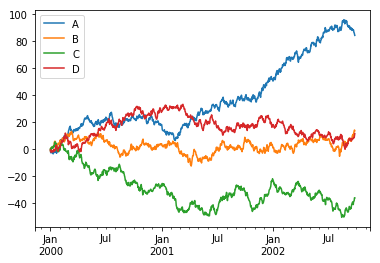

In [66]:
import matplotlib.pyplot as plt

pdf=pd.DataFrame(np.random.randn(1000, 4), index=ts.index,columns=['A', 'B', 'C', 'D'])
pdf = pdf.cumsum()
plt.figure(); pdf.plot(); plt.legend(loc='best')